# Analysis of the dataset after the dataprocessing step

What is the model actually getting?

In [31]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

In [1]:
import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
ds = datasets.load_from_disk('../data/dataset')['train'].select(range(10000))

In [3]:
ds.set_format('numpy')

In [4]:
ds

Dataset({
    features: ['meso_seq', 'thermo_seq', 'taxid', 'query_align_cov', 'subject_align_cov', 'bit_score', 'scaled_local_symmetric_percent_id', 'meso_seq_len', 'thermo_seq_len', 'seq_len_diff', 'meso_temp', 'thermo_temp', 'index', 'cluster', 'status_in_cluster'],
    num_rows: 10000
})

## Plots of length differences

Text(0.5, 1.0, 'Absolute difference in length')

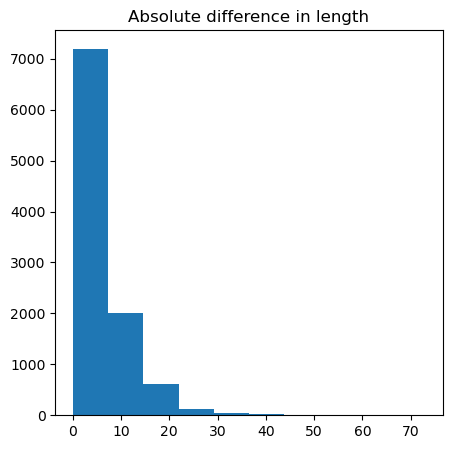

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(ds['seq_len_diff'])
ax.set_title('Absolute difference in length')

Text(0.5, 1.0, 'Normalized absolute difference in length')

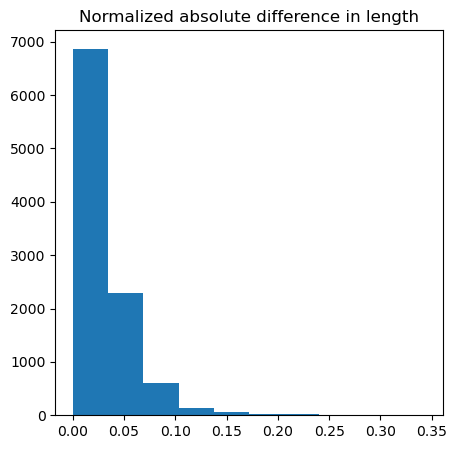

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
norm_len_diff = 2*np.array(ds['seq_len_diff'])/(ds['meso_seq_len']+ds['thermo_seq_len'])
ax.hist(norm_len_diff)
ax.set_title('Normalized absolute difference in length')

Text(0.5, 1.0, 'Normalized difference in length of thermo')

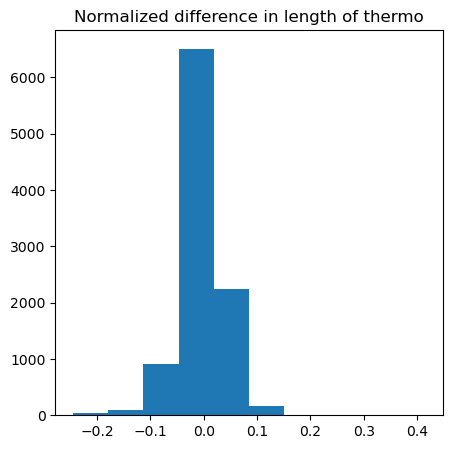

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
thermo_diff = (ds['thermo_seq_len'] - ds['meso_seq_len'])/ds['meso_seq_len']
ax.hist(thermo_diff)
ax.set_title('Normalized difference in length of thermo')

In [19]:
thermo_diff.mean()

-0.0023580521197379945

Thermo is lightly shorter on average

Text(0, 0.5, 'norm length difference')

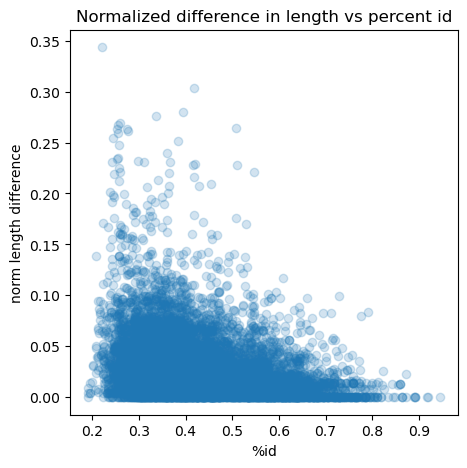

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(ds['scaled_local_symmetric_percent_id'], norm_len_diff, alpha=0.2)
ax.set_title('Normalized difference in length vs percent id')
ax.set_xlabel('%id')
ax.set_ylabel('norm length difference')

## Let's check if energy difference is actually negative for the thermophilic protein

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
sns.set_style('ticks')
sns.set_context('talk')

#### This is how we would normallly load it, if the job had finished, but gpus are taken so use existing replicates (see below)

In [2]:
with open('../data/proof_of_principle/training_data_estimated.json', 'r') as f:
    data = json.load(f)

In [3]:
data

{'meso_0': [-510.9825294506668, 4.568631109943226],
 'meso_1': [-282.8210576457263, 0.37310307196253234],
 'thermo_0': [-544.4764166430903, 3.5967204478156987],
 'thermo_1': [-250.91691294400556, 0.47586157073074276],
 'trans_0': [-544.13973862166, 5.942806395184618],
 'trans_1': [-287.04387773876795, 1.7391355120373646]}

#### Load replicates and run rosetta

In [ ]:
from nomelt.thermo_estimation.rosetta import minimize_structures
import numpy as np
import copy

In [1]:
WDIR = '../tmp/training_data_estimation'

In [ ]:
data = {}
for folder in os.listdir(WDIR):
    if os.path.isdir(os.path.join(WDIR, folder)):
        if not folder.split('_')[0] in ['meso', 'thermo', 'trans']:
            continue
        pdbs = [os.path.join(WDIR, folder, f) for f in os.listdir(os.path.join(WDIR, folder)) if f.startswith('ensemble_replicate')]
        print(f"found {len(pdbs)} for {folder}")

        energies = minimize_structures(pdbs)
        data[folder] = [np.mean(energies)]

found 25 for meso_26
core.import_pose.import_pose: File '../tmp/training_data_estimation/meso_26/ensemble_replicate_24.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 210
core.import_pose.import_pose: File '../tmp/training_data_estimation/meso_26/ensemble_replicate_14.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 210
core.import_pose.import_pose: File '../tmp/training_data_estimation/meso_26/ensemble_replicate_13.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 210
core.import_pose.import_pose: File '../tmp/training_data_estimation/meso_26/ensemble_replicate_23.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:

/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


core.import_pose.import_pose: File '../tmp/training_data_estimation/trans_25/ensemble_replicate_14.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue ALA:CtermProteinFull 232
core.conformation.Conformation: Found disulfide between residues 86 223
core.import_pose.import_pose: File '../tmp/training_data_estimation/trans_25/ensemble_replicate_13.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue ALA:CtermProteinFull 232
core.conformation.Conformation: Found disulfide between residues 86 223
core.import_pose.import_pose: File '../tmp/training_data_estimation/trans_25/ensemble_replicate_23.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue ALA:CtermProteinFull 232
core.conformation.Conformation: Found disulfide between residues 86 223
core.import_pose.import_pose: F

In [ ]:
data_ = copy.deepcopy(data)

Get lengths to normalize

In [ ]:
import pandas as pd

In [ ]:
seqs = pd.read_csv('../data/nomelt-model/predictions.tsv', header=None, sep='\t')

In [ ]:
data_norm = {}
for k, v in data_.items():
    if k.startwith('meso'):
        c = 0
    elif k.startwith('thermo'):
        c = 1
    else:
        c = 2

    r = int(k.split('_')[1])

    seq = ''.join(seqs.iloc[r, c].split())
    len_ = len(seq)
    new_val = v[0]/len_
    data_norm[k] = [new_val]

In [ ]:
data = data_norm

#### make plot

In [9]:
new_data = {}
for k, v in data.items():
    num = int(k.split('_')[-1])
    type_ = k.split('_')[0]
    if num not in new_data:
        new_data[num] = [None, None, None]
    if type_ == 'meso':
        new_data[num][0] = v[0]
    elif type_ == 'thermo':
        new_data[num][1] = v[0]
    else:
        new_data[num][2] = v[0]
    

In [10]:
new_data

{0: [-510.9825294506668, -544.4764166430903, -544.13973862166],
 1: [-282.8210576457263, -250.91691294400556, -287.04387773876795]}

In [15]:
vals = np.array([v for v in new_data.values()])
vals

array([[-510.98252945, -544.47641664, -544.13973862],
       [-282.82105765, -250.91691294, -287.04387774]])

In [16]:
true_diff = vals[:,1] - vals[:,0]
trans_diff = vals[:,2] - vals[:,0]

In [24]:
kde_data = pd.DataFrame({'True Difference': true_diff, 'Generated Difference': trans_diff}).melt()

<AxesSubplot: xlabel='value', ylabel='Density'>

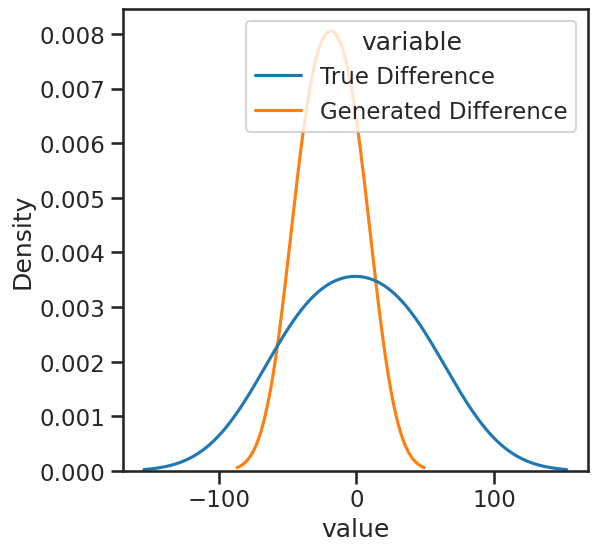

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=kde_data, x='value', hue='variable')